# 课题背景

病原细菌感染是全球人类健康的重大威胁之一。细菌分泌的胞外囊泡（EVs），在传染病的发生和发展中发挥着重要作用。然而，目前尚无有效方法快速检测和识别不同细菌来源的囊泡。在这里，我们希望结合无标记拉曼光谱和机器学习方法来识别病原体衍生囊泡。

## 加载数据

In [1]:
import numpy as np
train_x = np.load('data/train_x.npy')
train_y = np.load('data/train_y.npy')
wavenumber = np.load('data/wavenumber.npy')

import json 
label_dict = json.load(open('data/label.json'))

## 可视化每个类别的平均光谱

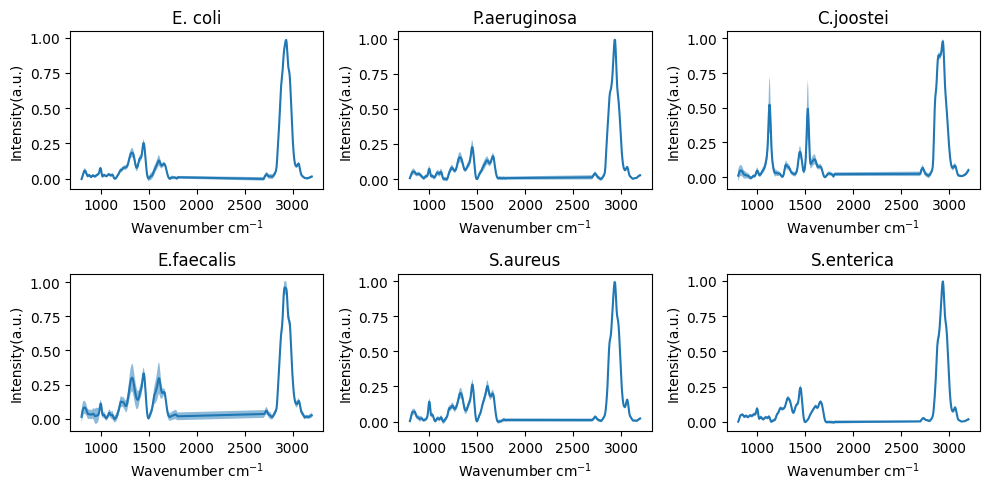

In [2]:
import matplotlib.pyplot as plt

num_class = int(max(train_y)+1)

plt.figure(figsize=(10, 5), tight_layout=True)
for i in range(num_class):
    plt.subplot(2, 3, i+1)
    plt.plot(wavenumber, train_x[train_y==i].mean(0))
    plt.fill_between(wavenumber, train_x[train_y==i].mean(0)-train_x[train_y==i].std(0), train_x[train_y==i].mean(0)+train_x[train_y==i].std(0), alpha=0.5)
    plt.title(label_dict[str(i)])
    plt.xlabel('Wavenumber cm$^{-1}$')
    plt.ylabel('Intensity(a.u.)')

## 划分训练与验证集

In [3]:
from sklearn.model_selection import train_test_split
train_x, eval_x, train_y, eval_y = train_test_split(train_x, train_y, test_size=0.2, random_state=42, stratify=train_y)

## 初始化分类模型（以线性回归为例）

In [4]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000,verbose=0)
clf.fit(train_x, train_y)


LogisticRegression(max_iter=1000)

## 输出验证集上的预测结果

In [5]:
from sklearn.metrics import accuracy_score

pred_y = clf.predict(eval_x)
print(accuracy_score(eval_y, pred_y))


0.9761904761904762


## 输出测试集的预测结果

In [6]:
import pandas as pd

test_x = np.load('data/test_x.npy')

pred_y = clf.predict(test_x)
pred_y = pd.Series(pred_y)
pred_y.to_csv('submit.csv', index=False)
